# ПРИНЯТИЕ РЕШЕНИЙ В БИЗНЕСЕ

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

 # Описание данных

**Данные для первой части***

Файл /datasets/hypothesis.csv

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
*  — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


Файл /datasets/orders.csv.

* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. 

* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Часть 1. Приоритизация гипотез.

In [1]:
import pandas as pd 
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#скачаем датасет и посмотрим на него
data = pd.read_csv('/datasets/hypothesis.csv')
data['Hypothesis']

0    Добавить два новых канала привлечения трафика,...
1    Запустить собственную службу доставки, что сок...
2    Добавить блоки рекомендаций товаров на сайт ин...
3    Изменить структура категорий, что увеличит кон...
4    Изменить цвет фона главной страницы, чтобы уве...
5    Добавить страницу отзывов клиентов о магазине,...
6    Показать на главной странице баннеры с актуаль...
7    Добавить форму подписки на все основные страни...
8    Запустить акцию, дающую скидку на товар в день...
Name: Hypothesis, dtype: object

Так как данные вполне корректны и не требуют продолжим дальнейший анализ. 

Применим фрейвор ICE для приоритезации гипотез

In [3]:
data['ICE']=round((data['Impact']*data['Confidence'])/data['Efforts'],2)
data[['Hypothesis','ICE']].sort_values(by='ICE',ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.20
0,"Добавить два новых канала привлечения трафика,...",13.33
7,Добавить форму подписки на все основные страни...,11.20
6,Показать на главной странице баннеры с актуаль...,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,7.00
1,"Запустить собственную службу доставки, что сок...",2.00
5,"Добавить страницу отзывов клиентов о магазине,...",1.33
3,"Изменить структура категорий, что увеличит кон...",1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",1.00


Применим фрейвор RICE для приоритезации гипотез

In [4]:
data['RICE']=(data['Reach']*data['Impact']*data['Confidence'])/data['Efforts']
data[['Hypothesis','RICE']].sort_values(by='RICE',ascending=False)

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE? 
При приоритезации методом RICE на первое место вышла гипотеза "Добавить форму подписки на все основные страни.." с "Добавить блоки рекомендаций товаров на сайт" , хоть ранее она занимала 5 позицию. Это связано с тем, что RICE учитывает не только влияние и уверенность во влиянии на изменения, но и количество людей, которое оно затронет. Для тестированияможно взять гипотезу о добавлении формы подписки на все основые страницы и добавлении блока рекоментаций товаров на сайт.

## Часть 2. Анализ A/B-теста

### Предобработка данных

In [5]:
#скачаем датасет и проведем предобработку
orders = pd.read_csv('/datasets/orders.csv')
print("Количество пустых ячеек:",orders.isnull().sum())
print("Количество дубликатов:",orders.duplicated().sum())

orders.info()
orders.head(5)

Количество пустых ячеек: transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
Количество дубликатов: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


С данными все хорошо, но нужно исправить формат для столбца data с object на datetime

In [6]:
orders["date"] = orders["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [7]:
#скачаем датасет и проведем предобработку
visits = pd.read_csv('/datasets/visitors.csv') 
print("Количество пустых ячеек:",visits.isnull().sum())
print("Количество дубликатов:",visits.duplicated().sum())

visits.info()
visits.head(5)

Количество пустых ячеек: date        0
group       0
visitors    0
dtype: int64
Количество дубликатов: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Аналогичено предыдущему набору исправит формат столбца 

In [8]:
visits["date"] = visits["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Предобработка завершина, можем приступать к дальнейшему анализу.

### Построим график кумулятивной выручки по группам.

In [9]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


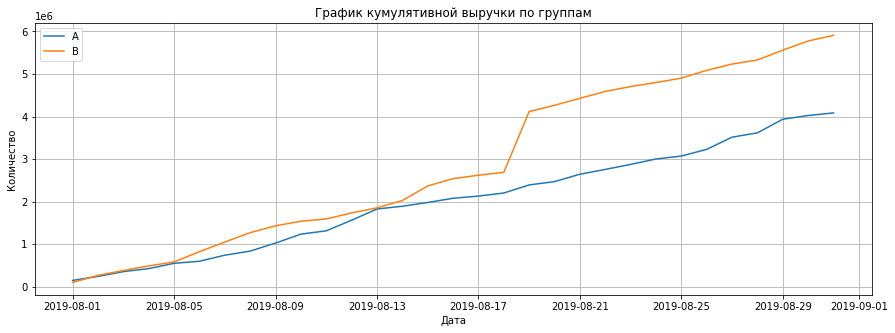

In [10]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,5))
plt.grid()
plt.title ("График кумулятивной выручки по группам")
plt.xlabel('Дата')
plt.ylabel('Количество')
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')


plt.legend() 

**Выручка почти равномерно увеличивается в течение всего теста. Хороший знак. В начале видно, что выручка группы группы B растет быстрее, чем группы А. Это можно наблюдать и в дальнейшем. Однако графики выручки группы B резко расстет в некоторых точках. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.** 


### Построим график кумулятивного среднего чека по группам.

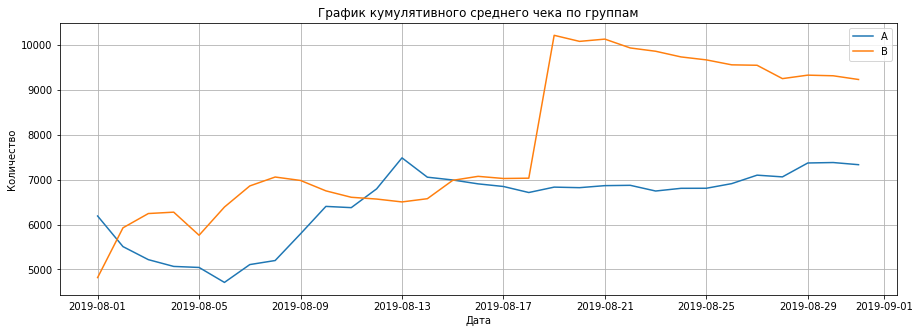

In [11]:
plt.figure(figsize=(15,5))
plt.grid()
plt.title ("График кумулятивного среднего чека по группам")
plt.xlabel('Дата')
plt.ylabel('Количество')

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()

**График очень неравномерный на всем промежутке и становится более плавным к концу эксперемента. Нужно большое данных, чтобы прийти к реальному среднему чеку и установиться на его уровне. Можно отметить, что как и на предыдущем графики: группа B берет преимущество над группой А, однако можно заметить и противоположную ситуцаию, например, 09-09-2019. Также можно заметить, что у группы B был резкий всплеск 18 или 19 августа, который связан с какой-то крупной продажей.**


### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

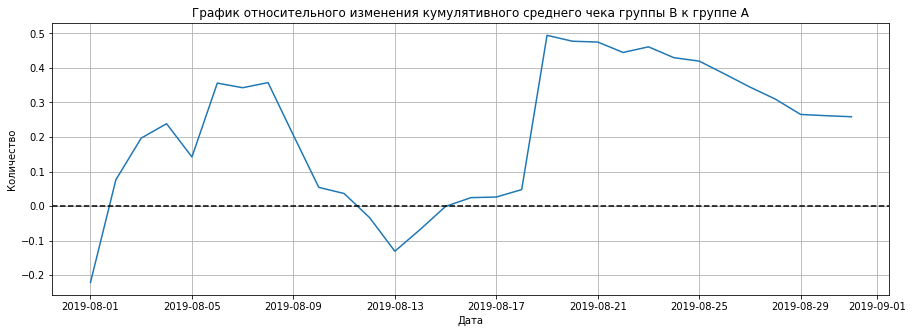

In [12]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.grid()
plt.title ("График относительного изменения кумулятивного среднего чека группы B к группе A")
plt.xlabel('Дата')
plt.ylabel('Количество')

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

**График полностю подтверждает предыдущие. На нем мы также видем, что группа А привысила средний чек группы В примерно в период с 12-14 августа, но вдальнейшем группа Б все равно вырвалась в период, особенно учитывая резкий скачок в продажах в период с 18 по 20 августа. К концу месяца замечается снижение лидрской позиии группы В, возможно в дальнейшем группа сможем его опередить по превышению среднего чека.** 


### Построим график кумулятивного среднего количества заказов на посетителя по группам.

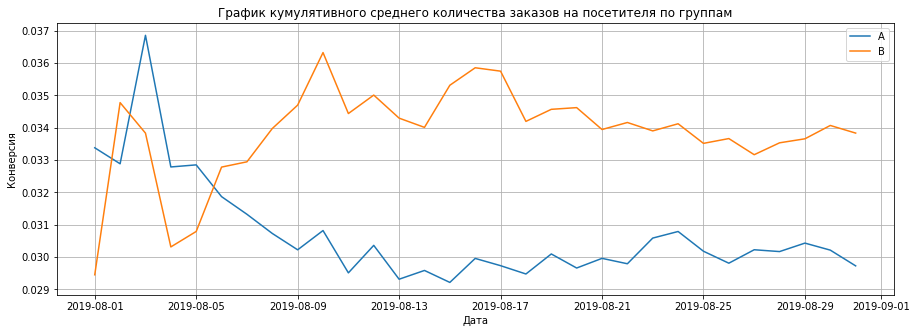

In [13]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,5))
plt.grid()
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title ("График кумулятивного среднего количества заказов на посетителя по группам")
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()



**В начале месяца можно заметить, что конверсия группы А превышает конверсию группы В. Примерно 6 августа они пересекаются и лидером становится группа В.  10 августа конверсия группы Б выросла до пика своего значения - выше 0,036. А группа А примерно 15 августа достигла своего минимального значения - меньше 0,029**
 

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

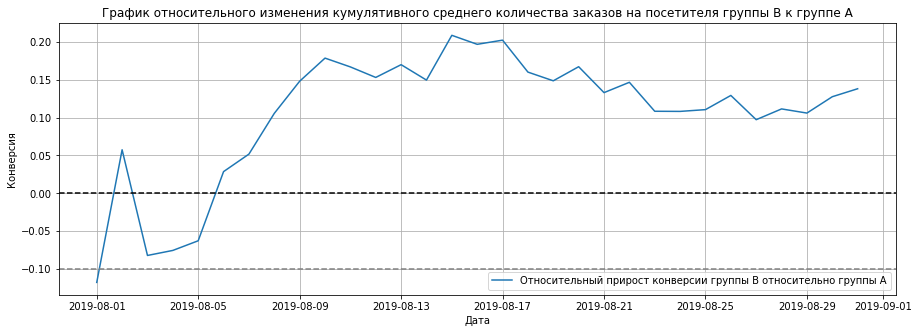

In [14]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


plt.figure(figsize=(15,5))
plt.grid()
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title ("График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A")
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')


**Как и на прошлом графике мы видем, что 1 августа и в период с 3 по 5 августа конверсия группы А была больше группы В примерно на 5-10%. 2 августа был всплекс конверсии группы В, аналогично группе А. После 6 августа конверсия группы В начала увеличиваться и сильно привысила конверсию группы А.** 


### Построим точечный график количества заказов по пользователям. 

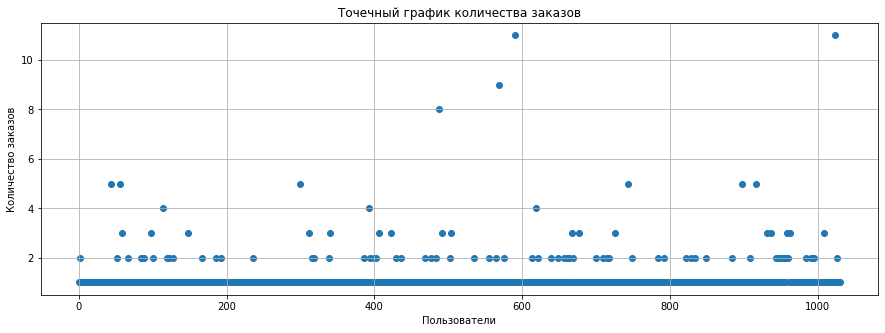

In [15]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))


plt.figure(figsize=(15,5))
plt.grid()
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.title ("Точечный график количества заказов")
plt.scatter(x_values, ordersByUsers['orders'])

**На графике видно, что большая часть покупателей произвели 1 покупу, также небольшое количество призвело 2 покупки. Более 4 заказов совершили единицы пользователей, которых можно считать аномалиями. Посчитаем 95-й и 99-й процентали**

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. 

In [16]:
print("95-й и 99-й перцентили количества заказов на пользователя:",np.percentile(ordersByUsers['orders'], [95, 99]))

95-й и 99-й перцентили количества заказов на пользователя: [2. 4.]


**Из этих значениев можно сделать вывод, что большее количество пользователей делают заказы в диапозоне 2-4 штук.За аномальные значения будем принимать значения больше 4**

### Построим точечный график стоимостей заказов. 

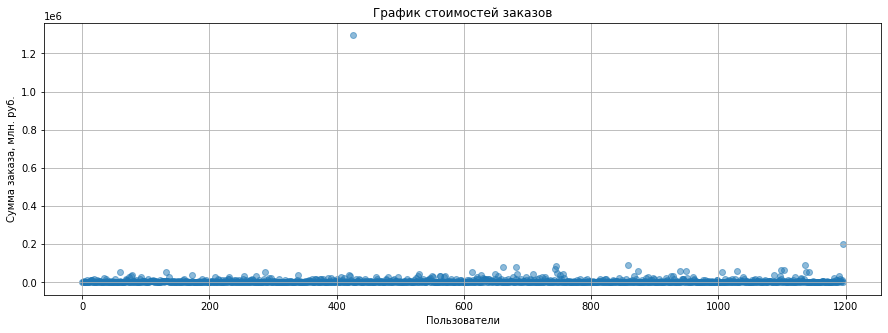

In [17]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(15,5))
plt.grid()
plt.xlabel('Пользователи')
plt.ylabel('Сумма заказа, млн. руб.')
plt.title('График стоимостей заказов')
plt.scatter(x_values, orders['revenue'], alpha=0.5)

Уменьшем диапазон расмотрения, для этого исключим выбросы, которые привышают 1 млн. Но перед этим посмотрим аномальное значение привышающе 1,2 млн. 

In [18]:
print(orders.query('revenue >= 1000000'))

     transactionId   visitorId       date  revenue group
425      590470918  1920142716 2019-08-19  1294500     B


Теперь стояло ясно с чем связан скачек среднего чека группы В в период с 18-20 августа. 19 августа был сделан заказ на суммы 1 294 500.

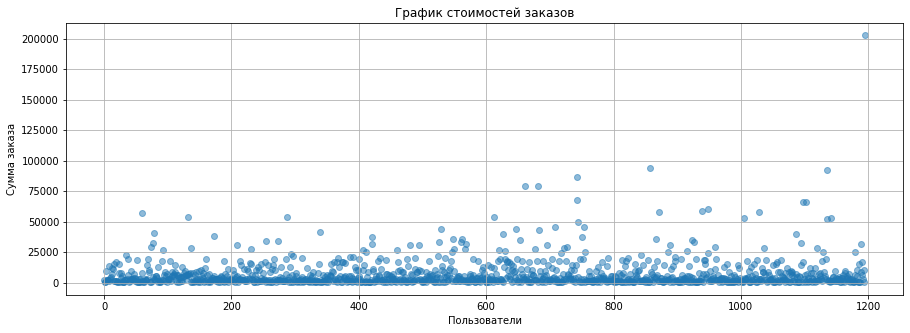

In [19]:
orders_new = orders.query('revenue <= 1000000')
x_values = pd.Series(range(0,len(orders_new['revenue'])))

plt.figure(figsize=(15,5))
plt.grid()
plt.xlabel('Пользователи')
plt.ylabel('Сумма заказа')
plt.title('График стоимостей заказов')
plt.scatter(x_values, orders_new['revenue'],alpha=0.5)

Из этого графика видно, что аномальными можно считать заказы привышающие 50000, но более точно можно это посмотреть взяв 95 и 99 проценталь. 

### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [20]:
print("95-й и 99-й перцентили стоимости заказов:",np.percentile(orders['revenue'], [95, 99]))

95-й и 99-й перцентили стоимости заказов: [28000.  58233.2]


**Теперь мы видим, что 99% заказов по стоимости меньше 58 233,2. А 95% заказов меньше 28 000**

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

Начнем с подготовки данных для работы

In [21]:
visitorsADaily = visits[visits['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#посчитатем количество пользователей  в группе A; 
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#проведем аналогичный посчет для группы В
visitorsBDaily = visits[visits['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

#посчитаем стоимость заказов для каждого пользователя группы А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

#посчиаем сумму на максимальную дату из периода для группы А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

#проведем аналогичную операцию для группы В 
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

#объединим получивший результат в одну таблицу
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'transactionId']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'transactionId']



Выдвинем нулевую гипотезу: "Различий в среднем количестве заказов на посетителя между группами нет". Альтернативная гипотеза будет звучать, как "Различий в среднем количестве заказов на посетителя между группами есть"

In [22]:
sampleA = pd.concat([ordersByUsersA['transactionId'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['transactionId'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])), name='orders')],axis=0)

print('Результаты исследования различий конверсий группы В и А:')
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

Результаты исследования различий конверсий группы В и А:
alpha = 0.05
p-value = 0.017
Относительный показатель 'B' и 'A' = 0.138


**Из полученны результатов можно отвергать нулевую гипотезу о том, что среднее количестве заказов на посетителя между группами А и В не имеет различий. По "сырым" данным различие между конверсиями группы А и В есть, группа В привышает группу А на 13,8%** 

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Выдвинем нулевую гипотезу: "Статическая значимость различий в среднем чеке заказов между группами отсутвует"
Альтернативная гипотеза: "Статическая значимость различий в среднем чеке заказов между группами присутвует"

In [23]:
print('Результаты исследования различий в среднем чеке заказа между группами группы В и А(по сырым данным):')
print("alpha =",0.05)
print("p-value: {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительность показателей В и А = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Результаты исследования различий в среднем чеке заказа между группами группы В и А(по сырым данным):
alpha = 0.05
p-value: 0.729
Относительность показателей В и А = 0.259


**Так как значение p-value больше 0,05, то смысла отвергать нулевую гипотезу нет.
Вывод: Статическая значимость различий в среднем чеке заказов между группами по «сырым» данным нет. Однако нужно отметить, что средний чек группы В больше на группы на 25,9%**

### Посчитам статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Для очищенных данных мы исключим пользователей, которые совершили больше 4 заказов и произвели покупку суммой больше 58233.2

In [24]:
#сделаем срез пользователей,которые сделали больше 4 заказов
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transactionId'] > 3]['visitorId'],
        ordersByUsersB[ordersByUsersB['transactionId'] > 3]['visitorId'],
    ],
    axis=0,
)

#сделаем срез пользователей, которые сделали заказ на сумму больше
usersWithExpensiveOrders = orders[orders['revenue'] > 58233.2]['visitorId']

#объединим пользователей в одну таблицу 
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)


Теперь посчитаем статистическую значимость различия средних чеков после удаления аномальных пользователей

In [25]:
sampleANew = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['transactionId'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])), \
                                       name='transactionId')],axis=0)

sampleBNew = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['transactionId'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])), \
                                       name='transactionId')],axis=0) 

print('Результаты различий в среднем количестве заказов на посетителя между группами группы В и А(по очищенным данным):')
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleANew, sampleBNew, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBNew.mean()/sampleANew.mean()-1)) 

Результаты различий в среднем количестве заказов на посетителя между группами группы В и А(по очищенным данным):
alpha = 0.05
p-value = 0.014
Относительный показатель 'B' и 'A' = 0.151


**Значение p-value сильно меньше значения alpha, поэтому можно опровергнуть нулевую гипотезу: статистическая значимость различий в среднем количестве заказов на посетителя между группами А и В есть. Причем конверсия группы В больше группы А примерно на 15,1%. Результаты не сильно отличаются от полученных при анализе на "сырых" данных.**

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [26]:
print('Результаты исследования различий в среднем чеке заказа между группами группы В и А(по очищенным данным):')
print("alpha =",0.05)
print("p-value: {0:.3f}".format(
        stats.mannwhitneyu(
            orders[np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],
            orders[np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1]))

print("Относительность показателей В и А = {0:.3f}".format(
        orders[np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()
        / orders[np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )]['revenue'].mean()- 1))

Результаты исследования различий в среднем чеке заказа между группами группы В и А(по очищенным данным):
alpha = 0.05
p-value: 0.959
Относительность показателей В и А = -0.014


**В ситуации с очищенными данными p-value сильно привышает 0,05, поэтому можно смело отвергать нулевую гипотезу. Следовательно, статическая значимость различий в среднем чеке заказов между группами присутвует. При исследовании "сырых" данных ситуация выглядела наоборот и мы принимали нулевую гипотезу. Если посмотреть на относительность покателей, то в первом случае она была положительной в пользу группы В, а сейчас она ниже среднего чека группы А на 1,4%. Это связано с анамальной продаже 19 августа в группе В.**



## Решение по результата теста

 Варианты решений: 
 1. Остановить тест, зафиксировать победу одной из групп. 
 2. Остановить тест, зафиксировать отсутствие различий между группами. 
 3. Продолжить тест.
 
 **Выводы, к которым мы пришли в результате тестирования:**

* По "сырым" и "очищенным" даннным мы опровергли нулевую гипотезу о том, что статистическая значимость различий в среднем количестве заказов на посетителя между группами А и В существует. То есть среднее количество заказов примерно равно в обоих группах, но стоит заметить, что группа В все равно превосходит группу А в в первом случае на 13,8%: а во втором случае на 15,1%. Можно сказать, что в  этом тесте победила группа В
 
* При проверки гипотезы о статической значимости различий в среднем чеке заказов между группами результаты на "сырых" и "очищенных" данных были разными. При анализе "сырых" данных мы принимали нулевую гипотезу и группа В сильно превосходила группу А (примерно на 25,9%). Но при анализе "очищенных" данных мы принимали нулевую гипотезу и сказали, что статистических различий среднего чека между группами нет и группа В незначительно проигрывает группе А (примерно на 15,1%). Это обосновано заказом в группе В от 19 августа суммой на 1,3 млн. 

**Общий вывод по тесту:** *Останавливаем тест, зафиксируем победу группе В. Несмотря на то, что среднее количество заказов примерно равно, но группа В все равно выигрывает, а средний чек заказов на "очищенных" данных показывает, что суммы статически равны и незначительный проигрыш группы В не влияет на результат.*
 